<a href="https://colab.research.google.com/github/jajoonaman/ML_DL_Work/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

Polynomial regression is a special case of linear regression where we fit a polynomial equation on the data with a curvilinear relationship between the target variable and the independent variables.

In a curvilinear relationship, the value of the target variable changes in a non-uniform manner with respect to the predictor (s).


### Uploading the training and testing dataset to the google drive.

In [ ]:
import io

from google.colab import files

upload1 = files.upload()
upload2 = files.upload()

Saving train.csv to train.csv


Saving test.csv to test.csv


###Importing certain essential libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Reading the dataset

In [ ]:
train = pd.read_csv("train.csv")
print(train.head())

test = pd.read_csv('test.csv')
print(test.head())

           id             date      price  ...     long  sqft_living15  sqft_lot15
0  2487200875  20141209T000000   604000.0  ... -122.393           1360        5000
1  7237550310  20140512T000000  1230000.0  ... -122.005           4760      101930
2  9212900260  20140527T000000   468000.0  ... -122.292           1330        6000
3   114101516  20140528T000000   310000.0  ... -122.229           1780       12697
4  6054650070  20141007T000000   400000.0  ... -122.045           1370       10208

[5 rows x 21 columns]
           id             date     price  ...     long  sqft_living15  sqft_lot15
0  3793500160  20150312T000000  323000.0  ... -122.031           2390        7570
1  1175000570  20150312T000000  530000.0  ... -122.394           1360        4850
2    16000397  20141205T000000  189000.0  ... -122.210           1060        5095
3   461000390  20140624T000000  687500.0  ... -122.368           1460        5000
4  7895500070  20150213T000000  240000.0  ... -122.282           1290

### Visualising of dataset with the help of seaborn heatmap.

A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors.

Used this to find and visualise the corelation btw the attributes.

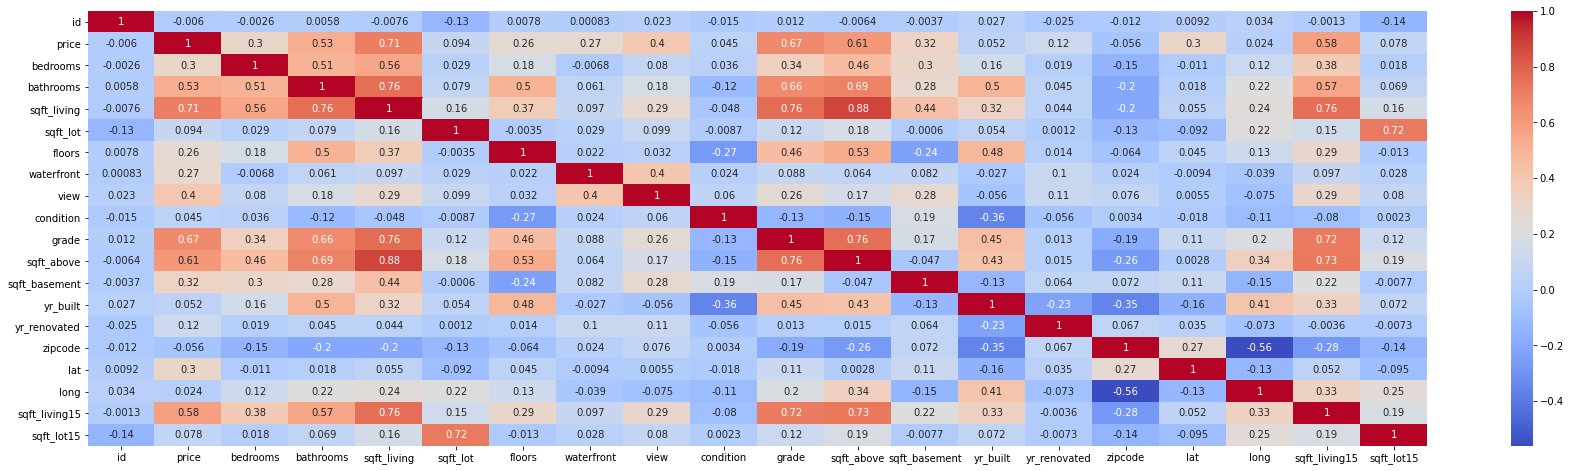

In [ ]:
plt.figure(figsize=(30,8))
sns.heatmap(train.corr(),cmap='coolwarm',annot = True)
plt.show()

In [ ]:
train.corr()["price"].sort_values(ascending=True) 

zipcode         -0.055619
id              -0.006011
long             0.023718
condition        0.044754
yr_built         0.051737
sqft_lot15       0.077960
sqft_lot         0.094146
yr_renovated     0.120439
floors           0.262955
waterfront       0.274953
lat              0.299191
bedrooms         0.300777
sqft_basement    0.322369
view             0.399711
bathrooms        0.527512
sqft_living15    0.584829
sqft_above       0.611450
grade            0.665594
sqft_living      0.705044
price            1.000000
Name: price, dtype: float64

After the visualisation of heatmap and calculation of the corelation shows that there are certain features which has a very minimum impact on our price value.

So, we try to findout the attributes which has greater impact on our dataset and keeping those values in it.

Then we look into the corelation and see that the feature which has a measure impact in our price is "sqft_living".

#### Finding out the missing values in our dataset.

In [ ]:
# Seeing Missing values in train data

# Total no. of values that are lost in the features
total = train.isnull().sum().sort_values(ascending=False)

# Percent of values that are lost
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)

# Observing the total missing values with there Percentage
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

               Total  Percent
sqft_lot15         0      0.0
view               0      0.0
date               0      0.0
price              0      0.0
bedrooms           0      0.0
bathrooms          0      0.0
sqft_living        0      0.0
sqft_lot           0      0.0
floors             0      0.0
waterfront         0      0.0
condition          0      0.0
sqft_living15      0      0.0
grade              0      0.0
sqft_above         0      0.0
sqft_basement      0      0.0
yr_built           0      0.0
yr_renovated       0      0.0
zipcode            0      0.0
lat                0      0.0
long               0      0.0
id                 0      0.0


As we can see that there are no missing values in our dataset.
Therefore, we can come up to the conclusion that our dataset is good to work on.

As from the above we observe that "sqft_living" has the most corelation with the price value so we take it as our main feature and deploy our SIMPLE POLYNOMIAL REGRESSION model on the dataset.

In [ ]:
# converting the dataframe to numpy array and reshaping it.
X_train = train['sqft_living'].to_numpy().reshape(-1,1)
y_train = train['price'].to_numpy().reshape(-1,1)

print("X = ",X_train)
print("\nY = ",y_train)

X =  [[1960]
 [5420]
 [1160]
 ...
 [3510]
 [1020]
 [1020]]

Y =  [[ 604000.]
 [1230000.]
 [ 468000.]
 ...
 [1010000.]
 [ 402101.]
 [ 325000.]]


### Importing the sklearn library 

Getting the polynomial feature on our values and fitting it on Linear Regression model to converrt it into the Polynomial Regression model. 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train)

from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_poly,y_train)

y_predict_train = lin.predict(X_poly)

#### Calculating the Root_Mean_Squared value and r2_score value for the train dataset by importing mean_squared_error and r2_score from sklearn.metrics library.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_train = np.sqrt(mean_squared_error(y_train, y_predict_train))
r2_train = r2_score(y_train, y_predict_train)
print("The root mean squared error for the test dataset: ",rmse_train)
print("\nThe r2_score for the train dataset: ",r2_train)

The root mean squared error for the test dataset:  251725.1298976819

The r2_score for the train dataset:  0.5606221587499747


#### Now calling the test data and applying the Polnomial Regression.

In [ ]:
X_test = test['sqft_living'].to_numpy().reshape(-1,1)
print(X_test)

y_test = test['price'].to_numpy().reshape(-1,1)
print(y_test)

[[1890]
 [1810]
 [1200]
 ...
 [2850]
 [1140]
 [1210]]
[[323000.]
 [530000.]
 [189000.]
 ...
 [608500.]
 [230000.]
 [414500.]]


In [ ]:
y_predict_test = lin.predict(poly.fit_transform(X_test))

#### Calculating the Root_Mean_Squared value and r2_score value for the test dataset by importing mean_squared_error and r2_score from sklearn.metrics library.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_test = np.sqrt(mean_squared_error(y_test, y_predict_test))
r2_test = r2_score(y_test, y_predict_test)
print("The root mean squared error for the test dataset: ", rmse_test)
print("\nThe r2_score for the test dataset: ", r2_test)

The root mean squared error for the test dataset:  247257.88207312734

The r2_score for the test dataset:  0.5244559685402255
